<a href="https://colab.research.google.com/github/lauratcc18/IAMINTIC/blob/main/6_LDA_Red_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Discriminant Analysis (LDA)
Técnica de aprendizaje supervisada predictiva para clasificación multiclase.

Para este ejercicio vamos a usar el dataset de calidad del vino tinto https://www.kaggle.com/datasets/piyushgoyal443/red-wine-dataset?select=wineQualityReds.csv que tiene 11 variables de entrada y una variable de salida (la calidad).

##1. Cargar los datos
En este caso como el dataset contiene una primera columna adicional no informativa, es necesario que se cargen solo las 12 columnas restantes.

In [ ]:
from google.colab import drive
from pandas import read_csv
from pandas import DataFrame

# Carga de datos desde google drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

dataset = read_csv('gdrive/MyDrive/Colab Notebooks/Dim Reduction/Feature extraction/wineQualityReds.csv')
wine = DataFrame(dataset)
# Selección de las 12 últimas columnas
cols = [i for i in range (1,13)]
wine = wine[wine.columns[cols]]
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Si observamos las características de la columna de calidad, vemos que tiene 1599 valores que varían entre 3 y 8.

In [ ]:
wine['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Por simplicidad del ejercicio, reagruparemos la variable de salida en 3 valores, dentro de una nueva columna:

- Calidad 1 para valores iniciales de calidad entre 3 y 4
- Calidad 2 para valores iniciales de calidad entre 5 y 6
- Calidad 3 para valores iniciales de calidad entre 7 y 8

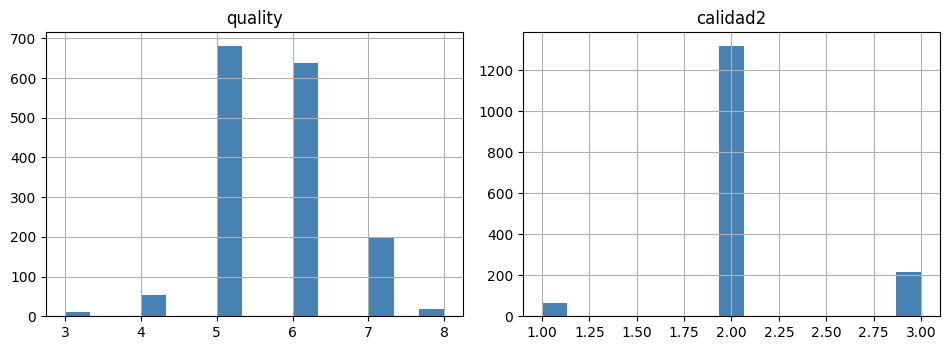

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generar la nueva columna
wine['calidad2'] = np.where(wine['quality'] <= 4, 1, np.where(wine['quality'] <= 6, 2, 3))

# Mostrar la distribución de los valores de las dos columnas
plt.rcParams["figure.figsize"] = [8.0, 3.0]
fig, axes = plt.subplots(1, 2)
wine['quality'].hist(bins=15, color='steelblue', grid=True, ax = axes[0])
wine['calidad2'].hist(bins=15, color='steelblue', grid=True, ax = axes[1])
axes[0].set_title('quality')
axes[1].set_title('calidad2')
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

##2. Aplicar PCA y LDA
Vamos a aplicar los dos algoritmos para comparar resultados

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Separamos las variables independientes de la variable dependiente
X = wine.drop(columns = ['quality', 'calidad2'])
y = wine['calidad2']
target_names = np.unique(y)
print("Variables objetivo: ", target_names)

# Aplicamos PCA sobre las entradas
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Aplicamos LDR sobre las entradas, considerando la salida para el ajuste (algoritmo supervisado)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X,y).transform(X)

Variables objetivo:  [1 2 3]


##3. Dibujamos los resultados

Ratio varianza explicada (2 PC): [0.94657698 0.0483683 ]


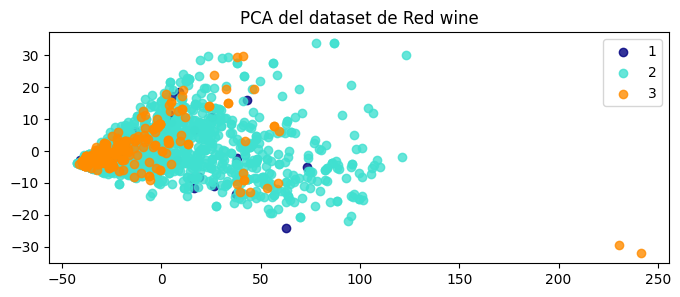

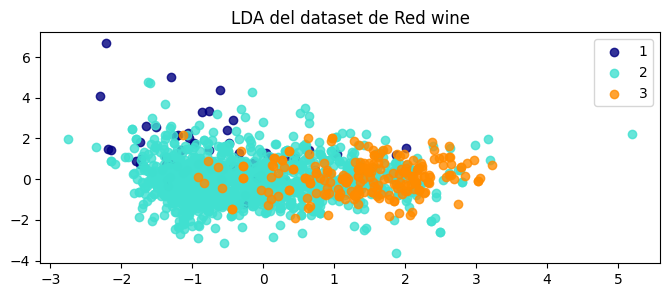

In [ ]:
# Porcentaje de varianza explicada para cada componente
print('Ratio varianza explicada (2 PC): %s' % str(pca.explained_variance_ratio_))
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw=1

# Resultados de PCA
for color, i, target_name in zip(colors, target_names, target_names):
  plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
              label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA del dataset de Red wine')

plt.figure()

# Resultados de LDA
for color, i, target_name in zip(colors, target_names, target_names):
  plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, lw=lw,
              label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA del dataset de Red wine')
plt.show()